## Observations and Insights 

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset


In [68]:
df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [69]:
# Checking the number of mice in the DataFrame.
outer_df["Mouse ID"].nunique()




249

In [70]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = df[df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [71]:
# Optional: Get all the data for the duplicate mouse ID. 


In [72]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_df = df[df["Mouse ID"] != "g989"]

In [73]:
# Checking the number of mice in the clean DataFrame.
drop_df["Mouse ID"].nunique()


248

## Summary Statistics

In [74]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
gb_df = drop_df.groupby(["Drug Regimen"])
mean_df = gb_df.mean()["Tumor Volume (mm3)"]
median_df = gb_df.median()["Tumor Volume (mm3)"]
var_df = gb_df.var()["Tumor Volume (mm3)"]
std_df = gb_df.std()["Tumor Volume (mm3)"]
sem_df = gb_df.sem()["Tumor Volume (mm3)"]


In [75]:
sum_table = pd.DataFrame({
                         "Mean": mean_df,
                         "Median": median_df,
                          "Variance": var_df,
                          "St Dev": std_df,
                          "SEM": sem_df
                         })
sum_table.style.set_caption("Tumor Volume (mm3)")
sum_table.head(10)

,Mean,Median,Variance,St Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
sum_table2 = gb_df.agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
sum_table2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

In [77]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

bar_df1 = pd.DataFrame(gb_df["Mouse ID"].count())
bar_df1 = bardata.sort_values(by=["Mouse ID"], ascending = False)
bar_df1

,Mouse ID
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


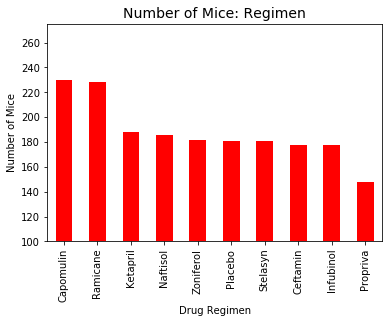

In [93]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
ax = bar_df1.plot.bar(legend= False, color ="r")
ax.set_ylabel("Number of Mice")
ax.set_title("Number of Mice: Regimen",  fontsize=14)
ax.set_ylim(100,275)
plt.show()


## Pie Plots

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
piedata = pd.DataFrame(drop_df.groupby("Sex").count()["Mouse ID"])
piedata

,Mouse ID
Sex,
Female,922
Male,958


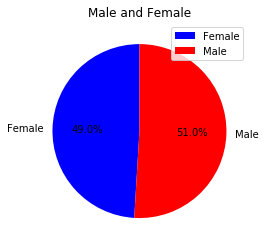

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue", "red"]
pie = piedata.plot.pie(y= "Mouse ID", autopct='%1.1f%%', colors = colors, startangle = 90)
pie.set_ylabel("")
pie.set_title("Male and Female")
plt.show()

## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
mousedf = drop_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index(drop=False)
mousedf

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [82]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [83]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = drop_df.loc[drop_df["Drug Regimen"] == "Capomulin"]
Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


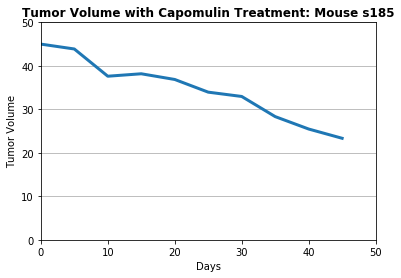

In [84]:
linegraph = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "s185"]
plt.plot(amouse["Timepoint"], amouse["Tumor Volume (mm3)"], linewidth=3)
plt.ylim(0,50)
plt.xlim(0,50)
plt.xlabel("Days")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume with Capomulin Treatment: Mouse s185", fontweight="bold")
plt.grid(axis="y")
plt.show()

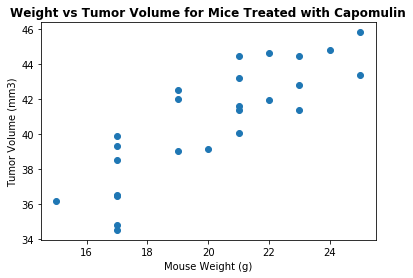

In [85]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scattergraph = Capomulin_df.groupby("Mouse ID").mean()
x_values = scattergraph["Weight (g)"]
y_values = scattergraph["Tumor Volume (mm3)"]
plt.scatter(x_values, y_values)
plt.title("Weight vs Tumor Volume for Mice Treated with Capomulin", fontweight="bold")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

In [86]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(scattergraph["Weight (g)"], scattergraph["Tumor Volume (mm3)"])
print({round(correlation[0],2)})


{0.84}


In [88]:
# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
linregress(x_values, y_values)

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

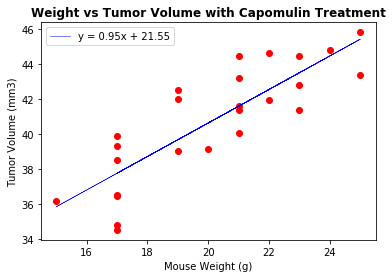

In [91]:
plt.scatter(x_values,y_values, color="r")
plt.plot(x_values,regress_values, color="b", linewidth=0.5, label=line_eq)
plt.legend()
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume with Capomulin Treatment", fontweight = "bold")
plt.show()

In [96]:
print("Observation Summary")



print("Observation 1: Given a correlation of 0.84, we can declare that there is a positive correlation between avg tumor volume and weight within the tested mice. ")

print("Observation 2: With the gender distribution being so evenly match, there shouldn't be any discrepancy or variation with the data.")

print("Observation 3: Capomulin and Ramicane were also the most successful drugs in reducing the size of the tumors within the mice subjects.")

Observation Summary
Observation 1: Given a correlation of 0.84, we can declare that there is a positive correlation between avg tumor volume and weight within the tested mice. 
Observation 2: With the gender distribution being so evenly match, there shouldn't be any discrepancy or variation with the data.
Observation 3: Capomulin and Ramicane were also the most successful drugs in reducing the size of the tumors within the mice subjects.
